In [1]:
#Q1.Generate any 2-D data set. Split the data set into Training Data set and Test Data set. 


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate a 2-D synthetic dataset
# Features (X): 100 points from a 2D Gaussian distribution
# Labels (y): Class 0 or 1 based on position

np.random.seed(42)  # for reproducibility

# Class 0: centered at (1, 1)
X0 = np.random.randn(50, 2) + np.array([1, 1])
y0 = np.zeros(50)

# Class 1: centered at (5, 5)
X1 = np.random.randn(50, 2) + np.array([5, 5])
y1 = np.ones(50)

# Combine into one dataset
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# 2. Split into training and test datasets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='Test', marker='x')
plt.title("2D Data Set with Train/Test Split")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]


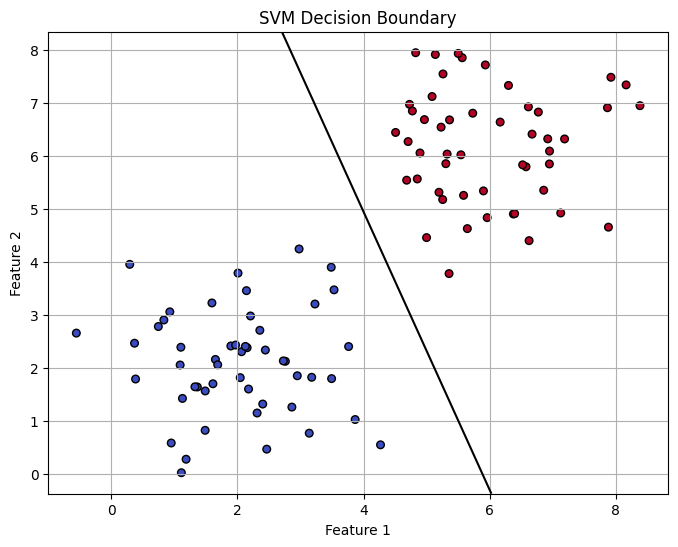

In [2]:
#Q2.Implement Support vector machine for classification of data. Assume your own dataset. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Generate a synthetic 2D dataset
np.random.seed(0)

# Class 0 centered at (2, 2)
X0 = np.random.randn(50, 2) + [2, 2]
y0 = np.zeros(50)

# Class 1 centered at (6, 6)
X1 = np.random.randn(50, 2) + [6, 6]
y1 = np.ones(50)

# Combine features and labels
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# 2. Split dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the SVM model
model = SVC(kernel='linear')  # you can also use 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# 6. Plot decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    # Scatter plot of data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, model)


In [3]:
#Q3.Write a program to Split the dataset into Training and Test Data set for any dataset. 


import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load your dataset (change the file path to your CSV file)
file_path = 'C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/property_data.csv'  # Replace with your actual file
data = pd.read_csv(file_path)

# 2. Separate features (X) and target/label (y)
# Assume the last column is the target
X = data.iloc[:, :-1]  # All columns except last
y = data.iloc[:, -1]   # Last column

# 3. Split the dataset into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Print the shapes of the datasets
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)

# Optional: Save to CSV
X_train.to_csv('C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/X_train.csv', index=False)
X_test.to_csv('C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/X_test.csv', index=False)
y_train.to_csv('C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/y_train.csv', index=False)
y_test.to_csv('C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/y_test.csv', index=False)


Training Features Shape: (229, 20)
Training Labels Shape: (229,)
Test Features Shape: (58, 20)
Test Labels Shape: (58,)


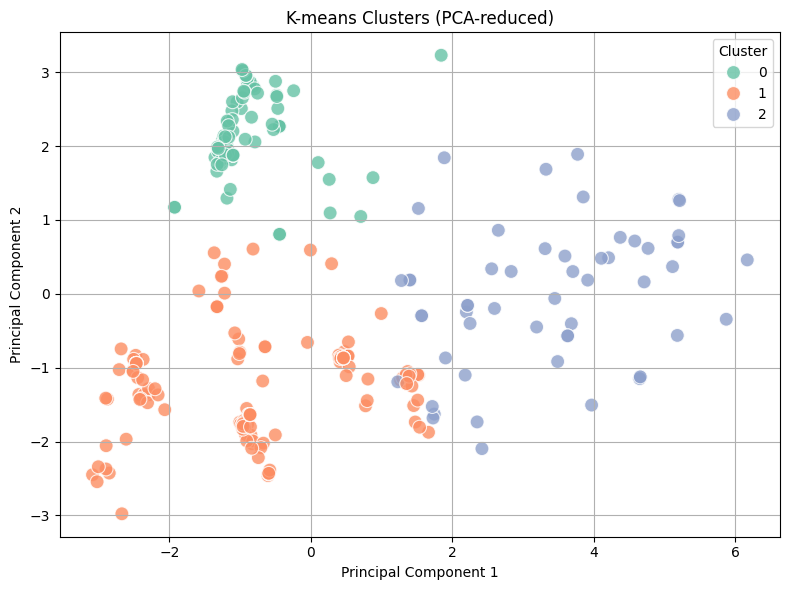

Number of properties per cluster:
cluster
1    147
0     84
2     56
Name: count, dtype: int64


In [4]:
#.Q4.Implement K-means clustering on any dataset and determine the number of clusters. 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/property_data.csv")

# Step 2: Select relevant numerical features for clustering
features = [
    "beds_final", "baths", "price", "size_value", 
    "is_apartment", "is_villa", "is_plot", "is_house", 
    "price_per_sqft", "bed_score", "bath_score", "property_grade"
]

df_cluster = df[features].copy()

# Step 3: Handle missing values (if any)
df_cluster.fillna(0, inplace=True)

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Step 5: Determine optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Step 6: Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=K, y=inertia, marker="o")
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Apply KMeans with chosen number of clusters (e.g., 3)
optimal_k = 3  # Change this based on elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 8: Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=df['cluster'], 
    palette="Set2",
    s=100,
    alpha=0.8
)
plt.title("K-means Clusters (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Print number of items per cluster
print("Number of properties per cluster:")
print(df['cluster'].value_counts())

# Step 10: Save clustered dataset (optional)
df.to_csv("C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/clustered_property_data.csv", index=False)


In [5]:
#Q5.Implement simple linear regression algorithm on any data set and explain the outcome. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv("C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/property_data.csv")

# Step 2: Select relevant columns and drop missing values
df_reg = df[['size_value', 'price']].dropna()

# Optional: Remove rows with zero size or price (invalid for regression)
df_reg = df_reg[(df_reg['size_value'] > 0) & (df_reg['price'] > 0)]

# Step 3: Define independent (X) and dependent (y) variables
X = df_reg[['size_value']]  # 2D array
y = df_reg['price']         # 1D array

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print outcomes
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])
print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

# Step 9: Visualize the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['size_value'], y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test['size_value'], y=y_pred, label='Predicted', color='red')
plt.title("Simple Linear Regression: Size vs. Price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Intercept (b0): -78256132779.1294
Coefficient (b1): 60331443.68507117
Mean Squared Error: 1.6629169763680436e+22
R-squared (R²): 0.05164243034399729


In [6]:
#Q6.Write a program to identify the dataset and apply pre-processing techniques for handling the missing values 


import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/property_data.csv")

# Step 2: Basic info about the dataset
print("----- Dataset Info -----")
print(df.info())  # data types & non-null counts
print("\n----- Summary of Missing Values -----")
print(df.isnull().sum())  # missing values per column

# Step 3: Handle missing values

# Strategy:
# - For numeric columns: fill missing values with median (robust to outliers)
# - For categorical/text columns: fill missing with mode (most frequent)
# - If column mostly missing or irrelevant, drop it

# Separate columns by type
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns' missing with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numeric column '{col}' with median: {median_val}")

# Fill categorical columns' missing with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: '{mode_val}'")

# Verify no missing values remain
print("\n----- Missing Values After Imputation -----")
print(df.isnull().sum())

# Optional: Save cleaned dataset
df.to_csv("C:/Users/harpr/OneDrive/Desktop/ML_Internal_QB_Answers/property_data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'property_data_cleaned.csv'")


----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            287 non-null    float64
 1   city            287 non-null    object 
 2   size_category   287 non-null    object 
 3   type            287 non-null    object 
 4   baths           287 non-null    float64
 5   price           287 non-null    float64
 6   neighborhood    287 non-null    object 
 7   year            287 non-null    float64
 8   month           287 non-null    float64
 9   size_value      287 non-null    float64
 10  is_apartment    287 non-null    int64  
 11  is_villa        287 non-null    int64  
 12  is_plot         287 non-null    int64  
 13  is_house        287 non-null    int64  
 14  bhk_from_type   287 non-null    float64
 15  beds_final      287 non-null    float64
 16  city_tier       287 non-null    int64  
 17  price_per_